# Machine Learning Model to Predict House Prices

In [ ]:
# Import necessary modules and functions

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 8

from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# Initial Exploration: Correlation and Visualization

In first part, the dataset is investigated listing several features of houses, including their sale price.

In [2]:
# Imported the 'HousePrices.csv' file into a Pandas DataFrame.
HousePrices = pd.read_csv('HousePrices.csv', delimiter=';')


In [3]:
# Printed the imported dataframe's column headers
HousePrices.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Printed the dataframe's first 10 rows
HousePrices.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Not all column names are self-explanatory. Each feature's descriptions can be seen below:

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


<i>SalePrice</i> is the main feature of interest. <b>.describe()</b> method will be used to print a table summarizing some key statistics of the distribution of these prices.

In [5]:
# The distribution of sale prices

HousePrices['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Even though we can see the key statistics with describe method a more intuitive way to summarize the sale prices in our dataset, is to visualize their distribution in a plot. To do this, I will be utilising the seaborn module that was already imported.

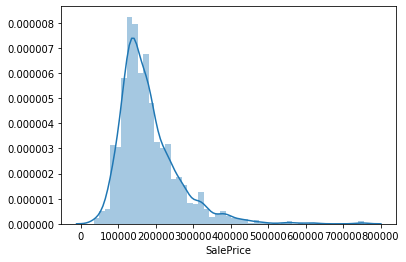

In [6]:
# The distribution of the SalePrice data

sns.distplot(HousePrices['SalePrice']);

The distribution clearly is <b>not</b> normal, as it leans left this means our distribution is "right skewed."




Next, I will be choosing two features that i suspect correlates most with <i>SalePrice</i>. Make two scatter plots and visualise them to see if there is indeed a correlation between sale price and chosen features.

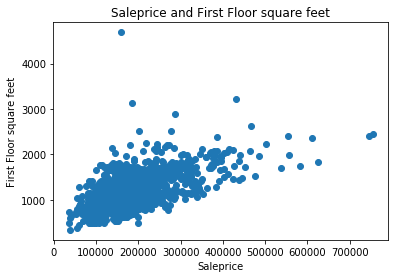

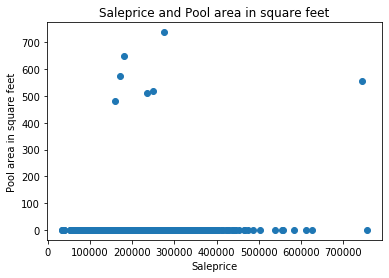

In [7]:
# SalePrice versus two other quantitative features, in separate scatter plots

plt.scatter(HousePrices['SalePrice'], HousePrices['1stFlrSF'])
plt.title('Saleprice and First Floor square feet')
plt.xlabel('Saleprice')
plt.ylabel('First Floor square feet')
plt.show()

plt.scatter(HousePrices['SalePrice'], HousePrices['PoolArea'])
plt.title('Saleprice and Pool area in square feet')
plt.xlabel('Saleprice')
plt.ylabel('Pool area in square feet')
plt.show()



As we can see, both of the poolarea and floor square feet have positive relationship with the sale price and they are right skewed. The distribution of both of them are quite similar to Saleprice which shows they have predictive power for saleprice except some outliers.

After taking advantage of scatter plot to observe some potential correlations, next, i will combine the data frame's <b>.corr()</b> method to calculate correlation coefficients between previously specified columns, with the <b>heatmap()</b> function from Seaborn to plot a correlation matrix.


           SalePrice  PoolArea  1stFlrSF
SalePrice   1.000000  0.092404  0.605852
PoolArea    0.092404  1.000000  0.131525
1stFlrSF    0.605852  0.131525  1.000000


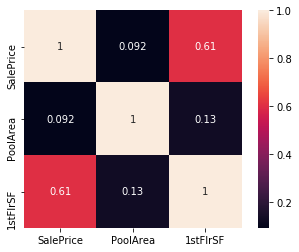

In [8]:
# cols = ['SalePrice', ...]
cols = ['SalePrice', 'PoolArea', '1stFlrSF']

# corrmat = ... .corr()
corr_matrix = HousePrices[cols].corr(method='pearson')
print(corr_matrix)

# sns.heatmap(corrmat, square=True, annot=True)

sns.heatmap(corr_matrix, square=True, annot=True)

Next, I choose "heating" variable, which I suspect influences a house's sale price.

Instead of a scatter plot, I use box-and-whisker plots as they can be insightful to visualize a quantitative variable's distribution versus individual categories of a categorical variable. 

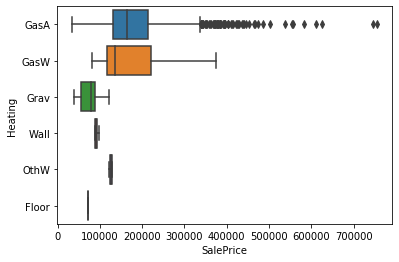

In [9]:
# Creating a boxplot for the chosen variable

sns.boxplot(HousePrices['SalePrice'], HousePrices['Heating'])

Next, I create a correlation matrix for the <i>entire</i> dataset, and visualize it with a heatmap as before.

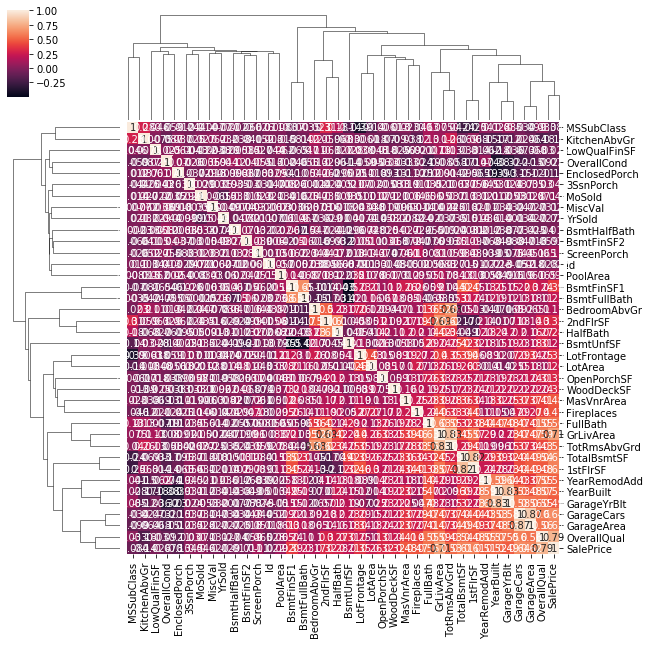

In [10]:
# Heatmap of the correlation matrix for the entire dataset.

corrmat2 = df.corr()
sns.heatmap(corrmat2, square=True)

# I chose to hide the values of correlation in the heatmap, otherwise it's not readable at all

Enclosed porch does not seem to corolate with anything which makes sence as the open porch looks like it corolates with many variables and people seem to have preferences towards open porch which explains the no corrolation with closed porch. Only numeric features will be measured in a correlation matrix due to qualitative/ categorical and quantitative variables thats why some features are missing.

The building class and Total rooms above grade seems to very highly corrolate. The reasong for this could be because people who look for buildings which have a better class which means better quality and better area will also look for very high grade rooms. So the high corroletion seem to make sense.


In next part, I zoom in on the 10 features which most strongly correlate with <i>SalePrice</i> and include the correlation coefficients between every pair of features in the heatmap using annotations.


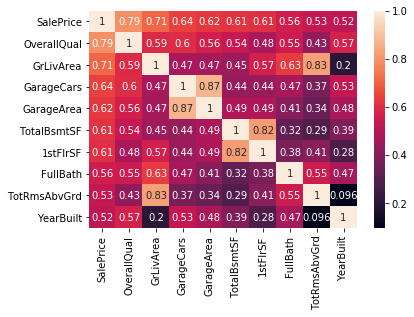

In [11]:
# Created a heatmap for the 10 features which best correlate with SalePrice

cols = corrmat2.nlargest(10,'SalePrice').index
sns.heatmap(corrmat2.loc[cols,cols], annot=True)

As we can see, several of the top features are strongly correlated (coefficient > 0.8) with each other, not just <i>SalePrice</i>:
* The number of cars that fit into a garrage is correlated with said garage's surface area
* The number of rooms above ground correlates with the livable surface area above ground
* The basement's surface area correlates tightly with the 1st floor's

The correlation isn't perfect, but there's still a lot of redundant information in these pairs. I will continue the analysis with the following features:
    
    SalePrice, OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt

# Missing Data and Outlier Detection

I will investigate if there are any missing values in the listed features, by chaining the <b>.isnull()</b> and <b>.sum()</b> dataframe methods.


In [12]:
# Checked how many entries are missing for the selected features

sec_df = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
sec_df.isnull().sum()

80

Null values can be safely ignored or huge hindrances, depending on the type of analysis being performed.

I will perform Ordinary Least Squares (OLS) Regression later on, which would be hindered by missing data. Thus, I am going to try and estimate how many cars fit in each garage, filling in the null values.


Next, I inspect what value <i>GarageArea</i> has for different amounts of <i>GarageCars</i>.

In [13]:
GarageAC = HousePrices[['GarageArea','GarageCars']]
#corrGarageAC = HousePrices[GarageAC].corr(method='pearson')
#sns.heatmap(corrGarageAC, square=True, annot=True, center=True,)

GA1 = GarageAC['GarageArea'][GarageAC['GarageCars'] == 1].min()
GA2 = GarageAC['GarageArea'][GarageAC['GarageCars'] == 2].min()
GA3 = GarageAC['GarageArea'][GarageAC['GarageCars'] == 3].min()
print(GA1)
print(GA2)
print(GA3)

# It seems that a single car needs about 160 squared feet


160
320
478


Down we can see the distribution of <i>GarageArea</i> for which <i>GarageCars</i> is null.

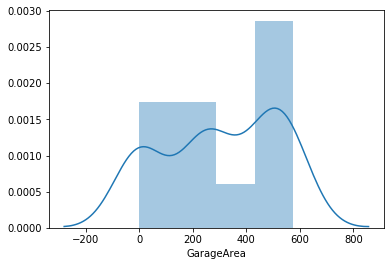

In [14]:
sns.distplot(HousePrices['GarageArea'][HousePrices['GarageCars'].isnull()])

Next, I compare the distributions of <i>GarageArea</i> between the houses with known versus unknown <i>GarageCars</i>. And fill in the missing values.

In [15]:
# Filling in the missing GarageCars values in df_houseprices
#sns.distplot(HousePrices['GarageArea'][~HousePrices['GarageCars'].isnull()])
#In the cells above, I found that a single car needs about 160 squared feet. So I filled the missing values based on that assumption. 
HousePrices['GarageCars'] = HousePrices['GarageCars'].fillna(HousePrices['GarageArea']/160).round()

Confirming there are no more missing values for <i>GarageCars</i>.

In [16]:
HousePrices['GarageCars'].isnull().sum()

0

The data might also contain outliers. Not all methods are equally susceptible to outliers, but it's important to identify them nonetheless. In general, removing outliers from data will improve the performance of models trained on said data.

Using scatter plot <i>SalePrice</i> against <i>GrLivArea</i> to see the outliers.

Text(0, 0.5, 'GrLivArea')

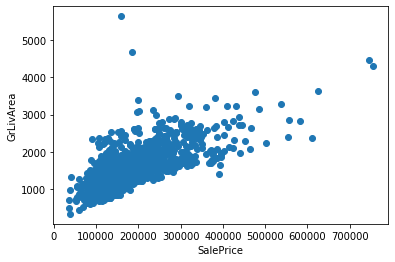

In [17]:
SPGA= plt.scatter(HousePrices['SalePrice'],HousePrices['GrLivArea'])
plt.xlabel("SalePrice")
plt.ylabel("GrLivArea")

The four points with the highest <i>GrLivArea</i> appear to be isolated, compared to the rest of the feature's values. The two at the top left corner seem to have a large amount of GrLivArea, but the SalePrice is not that high. So that is not in line with all the other houses. 


Printing all available data for the two possible outliers.

In [20]:
HousePrices[HousePrices['GrLivArea'] > 4500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


By looking at two of the outliers we can see not much stands out. The houses have some similar features as well as similar missing variables which might mean there could have been a problem while collecting the data or some other problem which caused them to be outliers.

Before training the model these two outliers will be removed.

In [22]:
# Dropping the outliers. 
to_drop = HousePrices.index[HousePrices['GrLivArea'] > 4500]
HousePrices.drop(to_drop, inplace=True)

# Data Transformation and Feature Derivation

At the beginig of the analysis, we made a distribution plot for <i>SalePrice</i>. I am going to produce the same plot in the next cell, but add a normal distribution fitted to the data along with it.


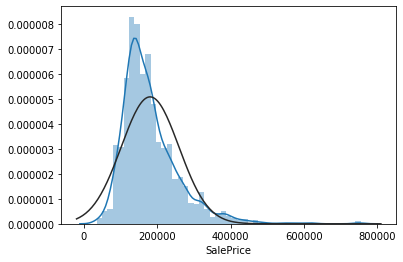

In [24]:
# A distribution plot for SalePrice with a fitted normal distribution
sns.distplot(HousePrices['SalePrice'], fit=norm)

A different way of visualizing how well data follows a normal distribution, is through a probability plot.

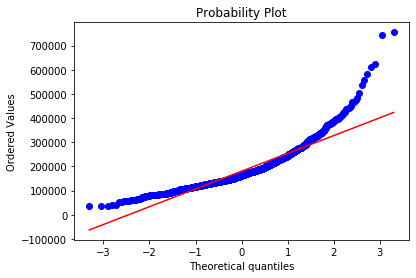

In [25]:
prob = stats.probplot(HousePrices['SalePrice'], dist='norm', plot=plt)

The theoretical quantiles are distributed in such a way, that if the data is normally distributed, it will follow the red line. However, <i>SalePrice</i> do not follow a normal distribution.

Positive (right) skew can sometimes be solved by log-transforming data. To do this, I add a column <i>LogSalePrice</i> with log-transformed prices to the dataframe and draw a new distribution plot.

In [27]:
HousePrices['LogSalePrice'] = np.log(HousePrices['SalePrice'])

Next, I draw the probability plot of your log-transformed values.

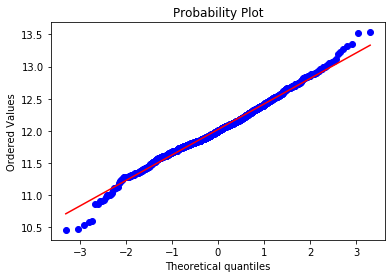

In [28]:
prob = stats.probplot(HousePrices['LogSalePrice'], dist='norm', plot=plt)

Now, our new feature is normally distributed, which is one of the assumptions of the statistical method I want to apply.

I am going to repeat this process for two more of our quantitative variables: <i>GrLivArea</i> and <i>TotalBsmtSF</i>.

First, by drawing a probability plot for <i>GrLivArea</i>.

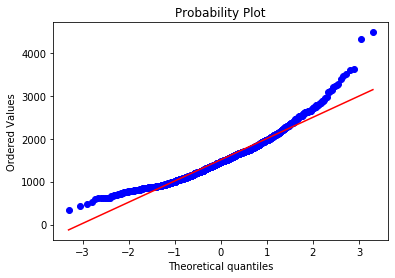

In [29]:
# A probability plot for GrLivArea
prob = stats.probplot(HousePrices['GrLivArea'], dist='norm', plot=plt)

Again this is a positive skew so as before, I add a log-transformed column <i>LogGrLivArea</i> to the dataframe and redraw the probability plot.

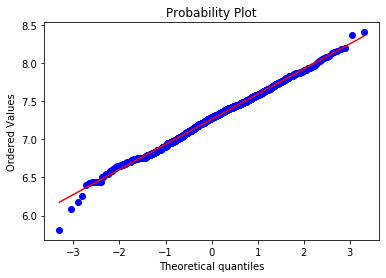

In [30]:
# A probability plot for LogGrLivArea
HousePrices['LogGrLivArea'] = np.log(HousePrices['GrLivArea'])
prob = stats.probplot(HousePrices['LogGrLivArea'], dist='norm', plot=plt)

It is obvious the log-transformed values follow the normal distribution more nicely than the untransformed ones. Next, I do this again with <i>TotalBsmtSF</i>.

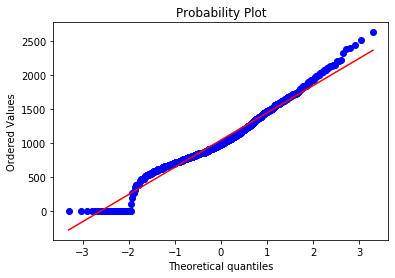

In [31]:
# A probability plot for TotalBsmtSF
prob = stats.probplot(HousePrices['TotalBsmtSF'], dist='norm', plot=plt)

It looks like there are many 0 values and it is not possible to log values of 0.

<i>Log(0)</i> does not exist, so log-transformation will not fix this.

One possible solution is to collapse our quantitative feature into a qualitative one, e.g. categorizing it into basements that are absent / small / medium / large. Even simpler would be to classify if a house does or does not have a basement at all.

Next, I draw a distribution plot for <i>TotalBsmtSF</i> to help decide which of these options makes more sense.

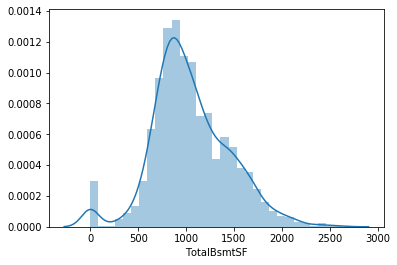

In [33]:
sns.distplot(HousePrices['TotalBsmtSF'])

Aside from the basements with a surface area of 0, there is only one clear peak in the distribution (albeit with a shoulder). Declaring arbitrary thresholds for size categories makes little sense here, so I'll add a boolean feature to describe whether or not a house has a basement at all.

In [38]:
HousePrices['HasBsmt'] = HousePrices['TotalBsmtSF']>0

Next, I check how the new feature relates to our sale prices. <i>HasBsmt</i> is categorical, so a boxplot is appropriate.

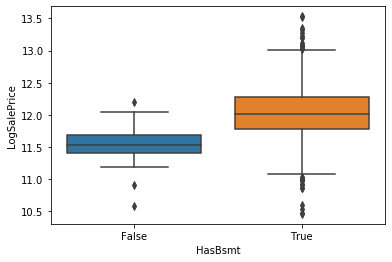

In [39]:
sns.boxplot(x=HousePrices['HasBsmt'], y=HousePrices['LogSalePrice'])
#I used LogSalePrice on the y axsis as it is normalsed while SalePrice is not

Having a basement does not corrolate with sale price so much.

An added benefit of normalizing our data with log-transformation, is that it's gotten rid of some heteroscedasticity.

Next, I will draw two scatter plots: 
1. <i>GrLivingArea</i> vs. <i>SalePrice</i>
2. <i>LogGrLivingArea</i> vs. <i>LogSalePrice</i>

Text(0, 0.5, 'LogSalePrice')

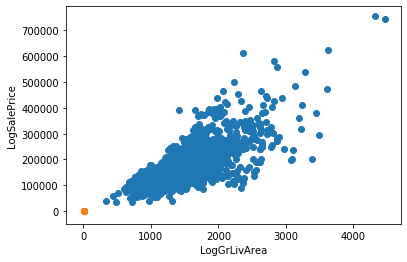

In [41]:
scatterplott = plt.scatter(HousePrices['GrLivArea'],HousePrices['SalePrice'])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")


Text(0, 0.5, 'LogSalePrice')

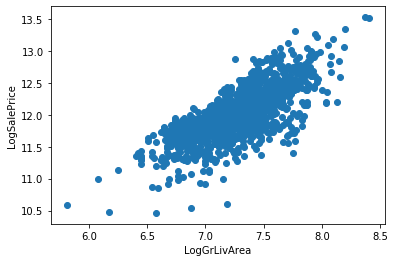

In [42]:
scatterplot15 = plt.scatter(HousePrices['LogGrLivArea'],HousePrices['LogSalePrice'])
plt.xlabel("LogGrLivArea")
plt.ylabel("LogSalePrice")

The second plot is more centralised and more envenly distributed over the axis compared to the first one.

The point density of the first cloud is inversely proportional to the distance along the axes: the cloud gets thinner at high values, and the average distance to an imaginary trendline increases. This indicates the plotted features are <i>not</i> homoscedastic, unlike the manner in which points are distributed in the log-transformed plot. 

# Last Step: Training a Regression Model

Now I am going to train an Ordinary Least Squares (OLS) regression model to predict these prices.

Running the next cell will split the relevant columns of the dataframe into a training and test set.

In [46]:
features = ['OverallQual','LogGrLivArea','GarageCars','FullBath','YearBuilt','HasBsmt']

X = HousePrices[features]
y = HousePrices['LogSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Train:Test = 70%:30%

In the next steps I, Instantiate a LinearRegression model object, fit the training data to it, and print the model's performance score on the training data.

In [47]:
# Instantiate and fit a linear regression model, then print its score

model = LinearRegression()
model.fit(X_train, y_train)
print (model.score(X_train, y_train))

0.8102455215201229


For regression models, the <b>.score()</b> method returns the coefficient of determination, also known as 'R squared' (R²). It reflects the proportion of variance explained by the model. For example, an R² of 0.80 means our model explains 80% of the variance in <i>LogSalePrice</i>.

Next, I check the model's R² for the <i>test</i> set. 

In [48]:
model = LinearRegression()
model.fit(X_test, y_test)
print (model.score(X_test, y_test))

0.8353815494916899


Next, I use the <b>.predict()</b> method to add a column labeled <i>LogPredSalePrice</i> to the dataframe and visualize what R² really means.

In [49]:
HousePrices['LogPredSalePrice'] = model.predict(X)
HousePrices['LogPredSalePrice']

0       12.387459
1       12.033845
2       12.342029
3       12.125116
4       12.615713
          ...    
1455    12.191530
1456    12.251047
1457    12.235539
1458    11.655874
1459    11.788313
Name: LogPredSalePrice, Length: 1455, dtype: float64

The cell below will plot your predicted prices versus the actual ones, with a red line on the diagonal. The closer the points are to the line, better the predictions.

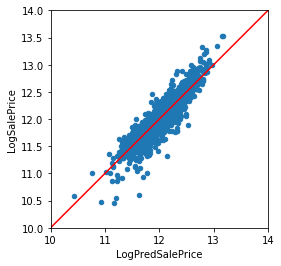

In [51]:
ax = HousePrices.plot.scatter(x='LogPredSalePrice',y='LogSalePrice')
plt.plot([10,14],[10,14],'r')
plt.axis([10,14,10,14])
ax.set_aspect('equal')

In addition to this scatter plot, I will plot a distribution of the errors.

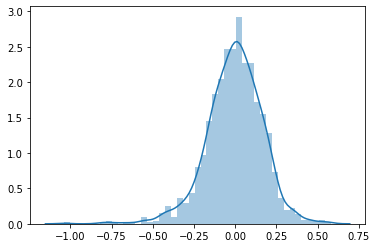

In [52]:
sns.distplot(HousePrices['LogSalePrice'] - HousePrices['LogPredSalePrice'] )

Finally, I add a column </i>PredSalePrice</i> to the dataframe.

Take the exponent of the predicted sale prices to undo taking the logarithm, and scatter plot it against the original <i>SalePrice</i>.

Text(0, 0.5, 'SalePrice')

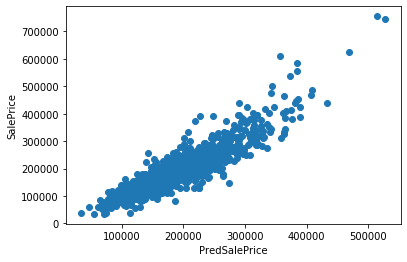

In [53]:
HousePrices['PredSalePrice'] = np.exp(HousePrices['LogPredSalePrice']).round()
SCGraph = plt.scatter(HousePrices['PredSalePrice'],HousePrices['SalePrice'])
plt.xlabel("PredSalePrice")
plt.ylabel("SalePrice")